<a href="https://colab.research.google.com/github/GandharvaThite/Projects-ML-AI-NLP-/blob/main/10ImgDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.test.is_built_with_cuda()

True

In [ ]:
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


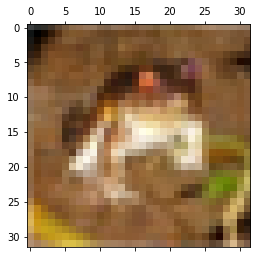

In [ ]:
plt.matshow(X_train[0])

In [ ]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
Y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
Y_train_categorical = keras.utils.to_categorical(
    Y_train,num_classes=10,dtype = 'float32'
)

In [ ]:
Y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
Y_test_categorical = keras.utils.to_categorical(
    Y_test,num_classes=10,dtype = 'float32'
)

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (32,32,3)),
                          keras.layers.Dense(32*32*3,activation = 'relu'),
                          keras.layers.Dense(32*32*3,activation = 'relu'),
                          keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer = 'SGD',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(X_train_scaled,Y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 9s 4ms/step - loss: 1.8104 - accuracy: 0.3571
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6181 - accuracy: 0.4295
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5356 - accuracy: 0.4613
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4743 - accuracy: 0.4817
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4243 - accuracy: 0.5024
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3816 - accuracy: 0.5156
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3436 - accuracy: 0.5258
Epoch 8/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3081 - accuracy: 0.5397
Epoch 9/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2740 - accuracy: 0.5526
Epoch 10/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.240

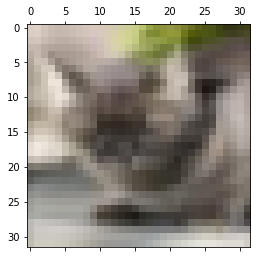

In [ ]:
plt.matshow(X_test_scaled[187])

In [ ]:
classes[np.argmax(model.predict(X_test_scaled)[187])]

313/313 [==============================] - 1s 2ms/step


'cat'

In [ ]:
model.evaluate(X_test_scaled,Y_test_categorical)

313/313 [==============================] - 1s 4ms/step - loss: 1.5970 - accuracy: 0.5637


[1.5969605445861816, 0.5637000203132629]